# Exploratory Data Analysis (EDA)

The majority of a gym's revenue comes from membership fees. However, many of their paying members don't actually show up on a regular basis. Therefore, gyms are dependent on these customers retaining their memberships as a steady source of revenue. In this file, we will explore the relationship between a customer's behavior and their likelihood of canceling their gym membership.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.duplicated().sum()

np.int64(0)

The data set contains 4,000 entries with 13 features. The target variable we want to predict is `churn` where a value of 1 means that the customer cancels their membership and 0 means they keep their membership. There is no missing data, and all entries have already been converted to numerical values. Most values in the data set are discrete with the exception of `Avg_additional_charges_total`, `Avg_class_frequency_total`, and `Avg_class_frequency_current_month`.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [6]:
df.groupby('Churn').mean().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


On average, it appears that there is a higher barrier to commit for members who cancel their membership. They are less likely to live/work near the gym, receive partner company discounts, and have a promotional discount. Additionally, they tend to have shorter contract periods, less time on their contracts, shorter lifetimes at this gym, and lower visit frequency.

In [7]:
df[df['Churn']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
Promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
Group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
Age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
Avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
Month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


In [8]:
df[df['Churn']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
Phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
Group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
Age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
Avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
Month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


## Visualizations

In this section, we will use histograms, boxplots, and barplots to visualize
* distribution of non binary features by `Churn` value
* distribution of binary features by `Churn` value

We can also create clusters to further understand how certain members behave based on their groupings. We will visualize these groupings using the first three principal components (PC).

In [9]:
quantitative_cols = []
binary_cols = []
for col in df.columns:
    if col != 'Churn':
        if len(df[col].unique()) > 2:
            quantitative_cols.append(col)
        else:
            binary_cols.append(col)
print(quantitative_cols)
print(binary_cols)

['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']


In [10]:
def plot_bar(df, figsize, nrows=None, ncols=None, relative=False):
    n_features = len(df.columns) - 1 # exclude 'Churn'

    # set nrows and ncols accordingly
    if nrows==ncols==None:
        ncols = 3
        nrows = nrows = (n_features//ncols) + (n_features%ncols!=0)
    elif nrows!=None and ncols!=None:
        if nrows*ncols < n_features:
            raise ValueError("nrows*ncols less than n_features")
    elif nrows==None and ncols!=None:
        nrows = (n_features//ncols) + (n_features%ncols!=0)
    elif nrows!=None and ncols==None:
        ncols = (n_features//nrows) + (n_features%nrows!=0)
    
    # plot
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    ax = ax.flatten()

    for idx in range(len(ax)):
        col = df.columns[idx] if idx < len(df.columns) else None
        if col != None and col != 'Churn': # only plot if col exists and is not 'Churn'
            sns.barplot(data=df.groupby(col).mean(), x=col, y='Churn', ax=ax[idx])
            
            ax[idx].set_title(f'Churns rate by {col}', fontsize=14)
            ax[idx].set_xlabel(f'{col}', fontsize=12)
            ax[idx].set_ylabel(None)
            if idx%ncols==0:
                ax[idx].set_ylabel('Churn rate (%)', fontsize=12)
        else:
            ax[idx].text(0.5, 0.5, 'None', fontsize=20,
                         horizontalalignment='center', verticalalignment='center', transform=ax[idx].transAxes)
    return (fig, ax)

In [11]:
def plot_box(df, figsize, nrows=None, ncols=None):
    n_features = len(df.columns) -  1 # exclude 'Churn'

    # set nrows and ncols accordingly
    if nrows==ncols==None:
        ncols = 3
        nrows = nrows = (n_features//ncols) + (n_features%ncols!=0)
    elif nrows!=None and ncols!=None:
        if nrows*ncols < n_features:
            raise ValueError("nrows*ncols less than n_features")
    elif nrows==None and ncols!=None:
        nrows = (n_features//ncols) + (n_features%ncols!=0)
    elif nrows!=None and ncols==None:
        ncols = (n_features//nrows) + (n_features%nrows!=0)
    
    # plot
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    ax = ax.flatten()

    for idx in range(len(ax)):
        col = df.columns[idx] if idx < len(df.columns) else None
        if col != None and col != 'Churn': # only plot if col exists and is not 'Churn'
        
            sns.boxplot(data=df, y=df[col], hue=df['Churn'], showmeans=True, ax=ax[idx]) 
            ax[idx].set_title(f'{col} Boxplot', fontsize=14)
            ax[idx].set_ylabel(f'{col}', fontsize=12)
            ax[idx].grid()
        else:
            ax[idx].text(0.5, 0.5, 'None', fontsize=20,
                         horizontalalignment='center', verticalalignment='center', transform=ax[idx].transAxes)
    return (fig, ax)


def plot_hist(df, figsize, nrows=None, ncols=None):
    n_features = len(df.columns) -  1 # exclude 'Churn'

    # set nrows and ncols accordingly
    if nrows==ncols==None:
        ncols = 3
        nrows = nrows = (n_features//ncols) + (n_features%ncols!=0)
    elif nrows!=None and ncols!=None:
        if nrows*ncols < n_features:
            raise ValueError("nrows*ncols less than n_features")
    elif nrows==None and ncols!=None:
        nrows = (n_features//ncols) + (n_features%ncols!=0)
    elif nrows!=None and ncols==None:
        ncols = (n_features//nrows) + (n_features%nrows!=0)
    
    # plot
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    ax = ax.flatten()

    for idx in range(len(ax)):
        col = df.columns[idx] if idx < len(df.columns) else None
        if col != None and col != 'Churn': # only plot if col exists and is not 'Churn'
            kde = True if col[:3]=='Avg' else False
            sns.histplot(data=df, x=df[col], hue=df['Churn'], kde=kde, ax=ax[idx])
            
            col_mean = df[col].mean()
            top, bottom = ax[idx].get_ylim()
            ax[idx].plot(2*[col_mean], [top, bottom], '--r', label='Feature Mean')
            ax[idx].set_title(f'{col} Distribution', fontsize=14)
            ax[idx].set_xlabel(f'{col}', fontsize=12)
            ax[idx].set_ylabel(None)
            ax[idx].grid()
            if idx%ncols==0:
                ax[idx].set_ylabel('Count', fontsize=12)
        else:
            ax[idx].text(0.5, 0.5, 'None', fontsize=20,
                         horizontalalignment='center', verticalalignment='center', transform=ax[idx].transAxes)
    return (fig, ax)


def plot_bar(df, figsize, nrows=None, ncols=None, relative=False):
    n_features = len(df.columns) - 1 # exclude 'Churn'

    # set nrows and ncols accordingly
    if nrows==ncols==None:
        ncols = 3
        nrows = nrows = (n_features//ncols) + (n_features%ncols!=0)
    elif nrows!=None and ncols!=None:
        if nrows*ncols < n_features:
            raise ValueError("nrows*ncols less than n_features")
    elif nrows==None and ncols!=None:
        nrows = (n_features//ncols) + (n_features%ncols!=0)
    elif nrows!=None and ncols==None:
        ncols = (n_features//nrows) + (n_features%nrows!=0)
    
    # plot
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    ax = ax.flatten()

    for idx in range(len(ax)):
        col = df.columns[idx] if idx < len(df.columns) else None
        if col != None and col != 'Churn': # only plot if col exists and is not 'Churn'
            if relative:
                sns.barplot(data=df.groupby(col).mean(), x=col, y='Churn', ax=ax[idx])    
                ax[idx].set_title(f'Churns rate by {col}', fontsize=14)
                ax[idx].set_ylabel(None)
                
            else:
                sns.countplot(data=df, x=df[col], hue=df['Churn'], ax=ax[idx])
                ax[idx].set_title(f'Churns by {col}', fontsize=14)
                ax[idx].set_ylabel(None)
                    
            ax[idx].set_xlabel(f'{col}', fontsize=12)
            if idx%ncols==0:
                ax[idx].set_ylabel('Churn rate (%)', fontsize=12) if relative else ax[idx].set_ylabel('Count', fontsize=12)
            else:
                ax[idx].set_ylabel(None)
            
        else:
            ax[idx].text(0.5, 0.5, 'None', fontsize=20,
                         horizontalalignment='center', verticalalignment='center', transform=ax[idx].transAxes)
    return (fig, ax)

## Quantitative Feature Plots

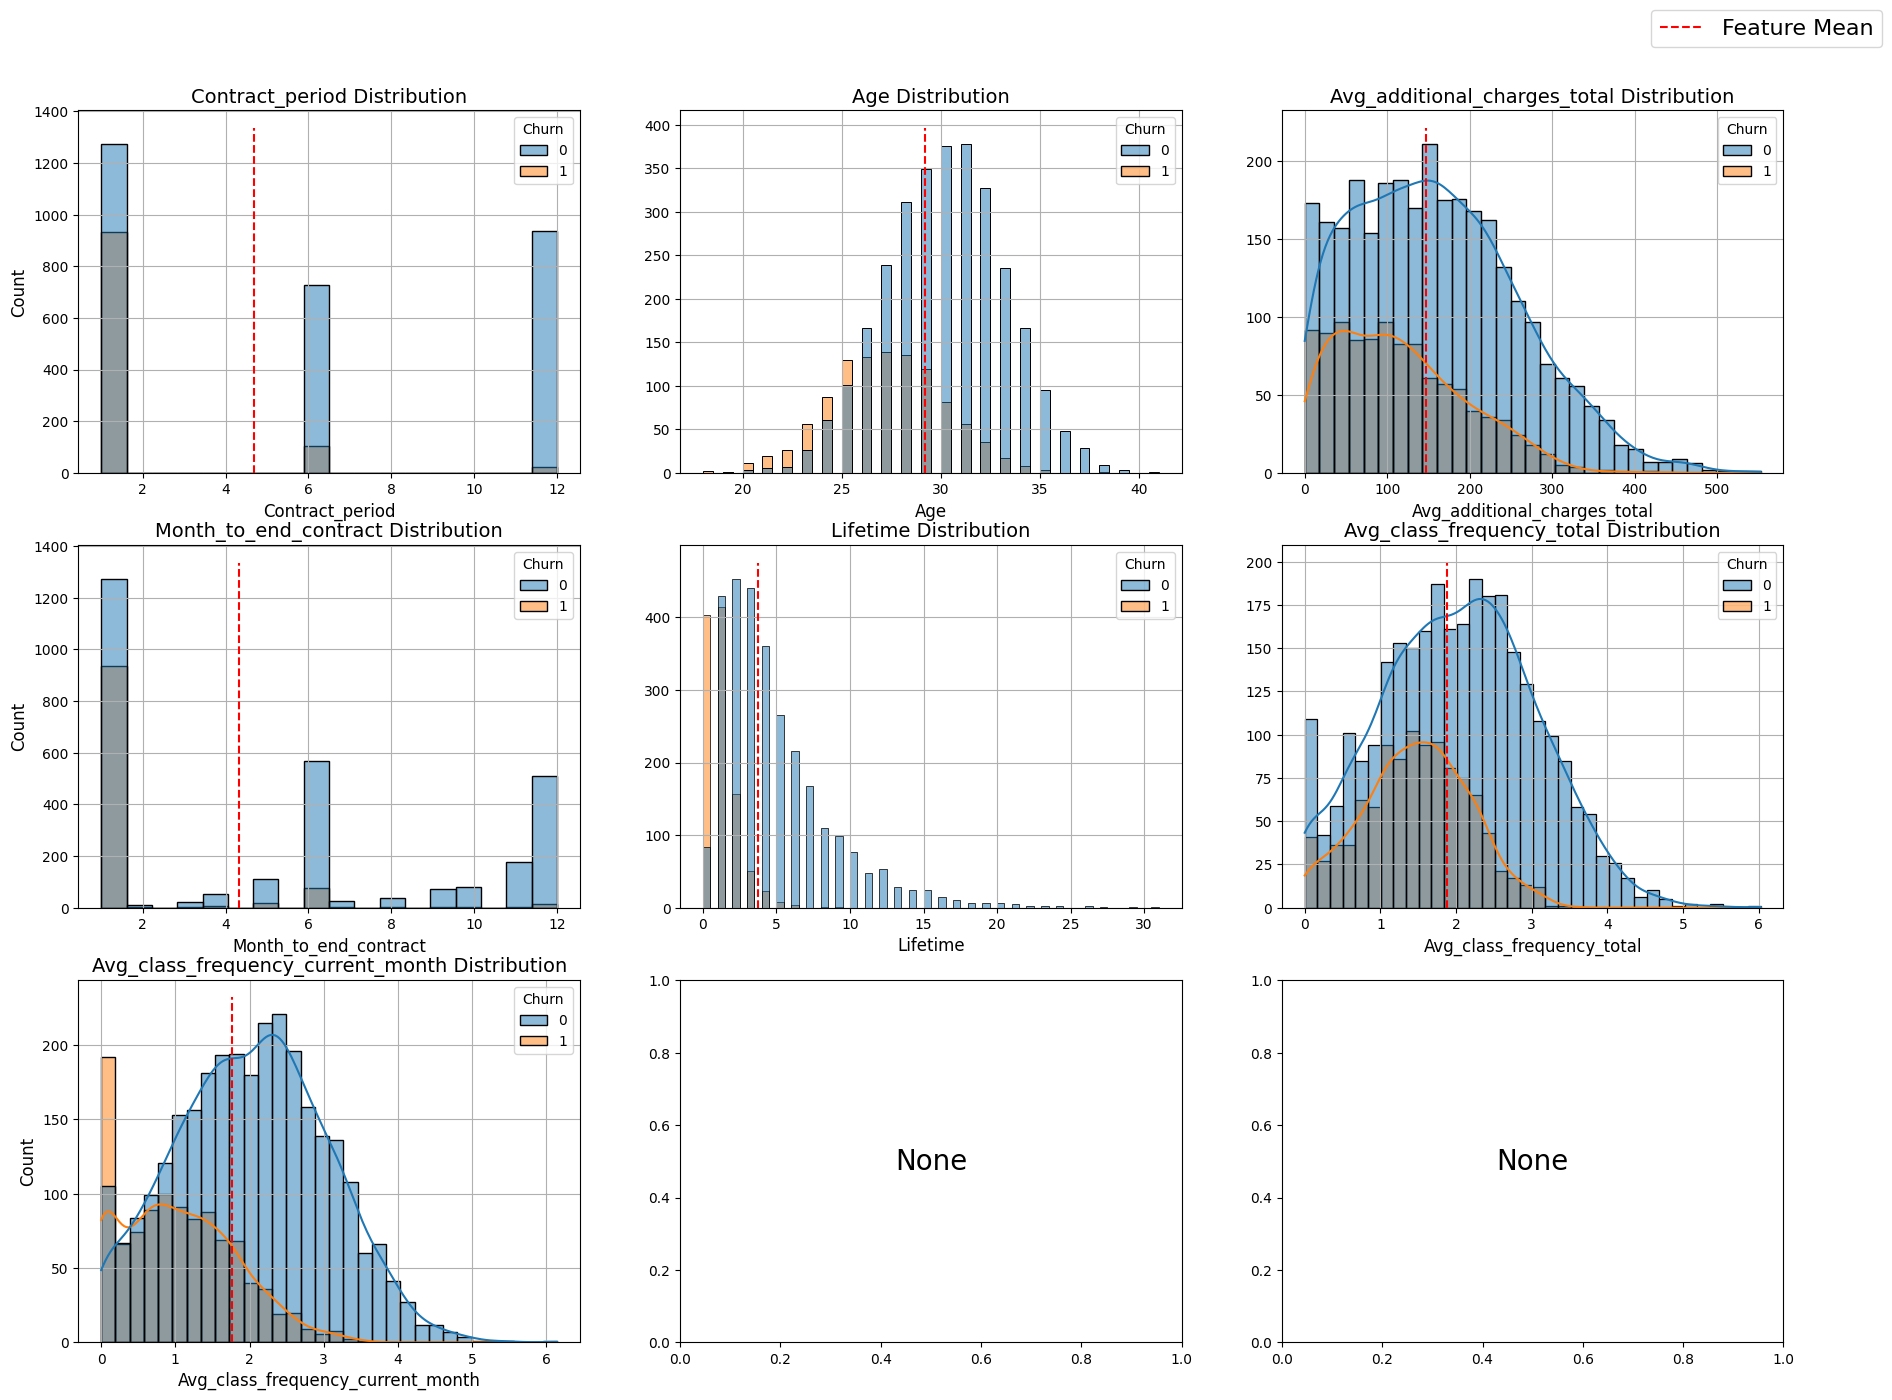

In [12]:
fig, ax = plot_hist(df[quantitative_cols+['Churn']], figsize=(22,16))
handle, label = ax[0].get_legend_handles_labels()
fig.legend(handle, label, fontsize=16, bbox_to_anchor=(0.95,0.95))
plt.show()

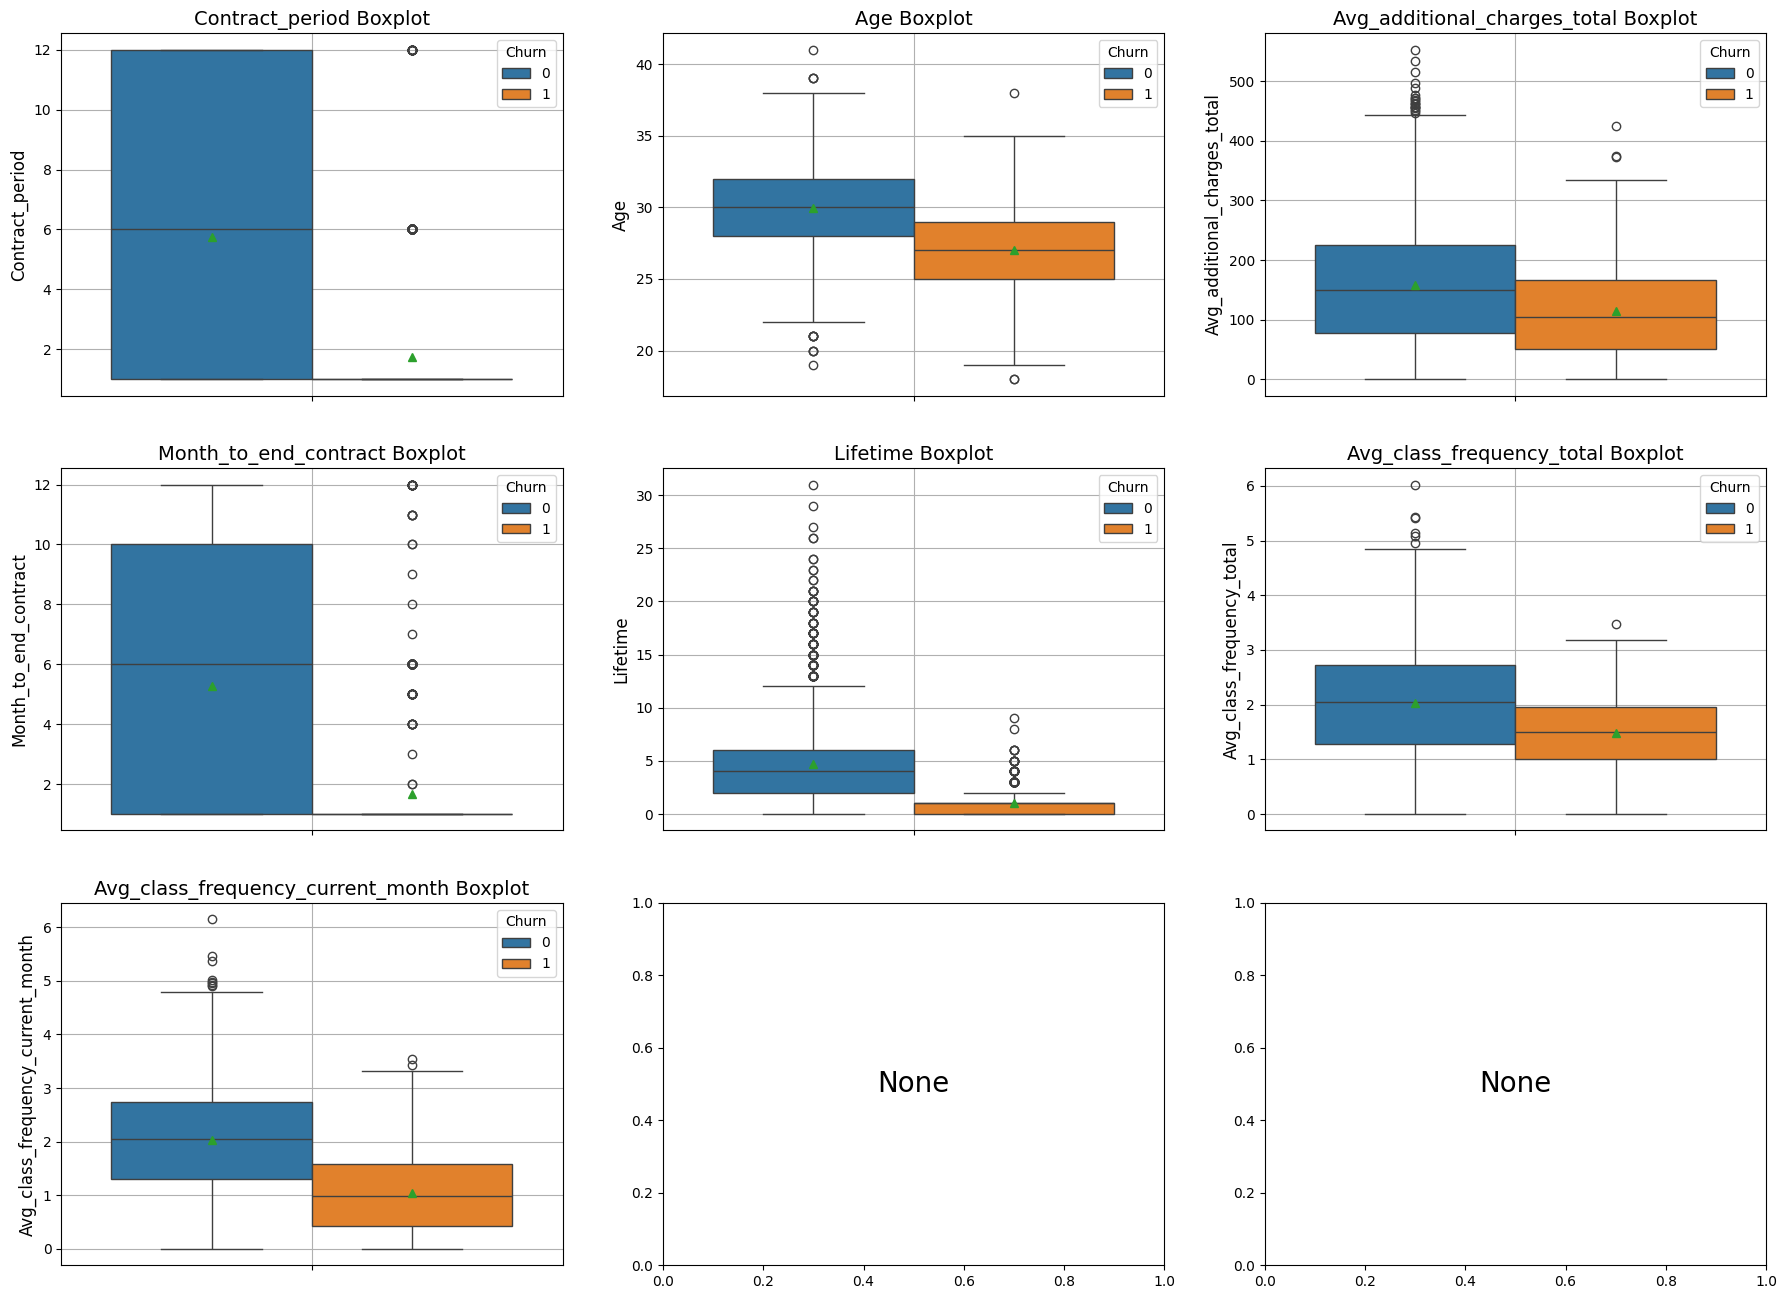

In [13]:
fig, ax = plot_box(df[quantitative_cols+['Churn']], figsize=(22,16))
plt.show()

We can gain some valuable insights from these plots. 

1. The members most at risk of canceling their memberships have shorter contracts and less time remaining on their contracts.

2. Age is relatively normally distributed, but members that leave the gym tend to skew towards the younger side.

3. New customers are more likely to cancel their memberships.

Let's focus on the `Lifetime` plots specifically. From the histogram and boxplot, we see that members who cancel their memberships have a gym lifetime < 1 year. Lets visualize the distribution of gym lifetime in users who did eventually cancel their memberships.

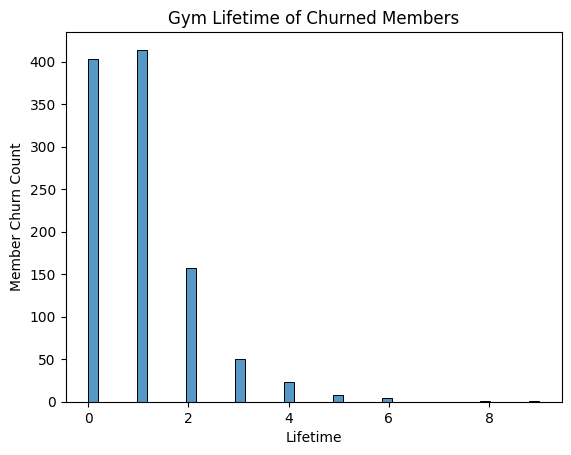

In [14]:
sns.histplot(data=df[df['Churn']==1], x='Lifetime')
plt.title('Gym Lifetime of Churned Members')
plt.ylabel('Member Churn Count')
plt.show()

Members that decide to cancel their memberships tend to do so withing the first couple of months from when they join. This makes a members first few months with the gym critical to their decision on whether or not to leave. One reasonable explanation is that these members sign up during the holiday season with a new year's resolution in mind, only to give up once they realize that their goals are unsustainable. Unfortunately, we do not have access to member sign-up dates which makes validating this hypothesis difficult.

Another interesting relationship can be found in the `Avg_class_frequency_current_month` histogram. There is a sharp increase in the amount of churned members who had a gym frequency of 0 in the current month. It is essential to keep these members engaged in gym activities to entice them to retain their membership status.

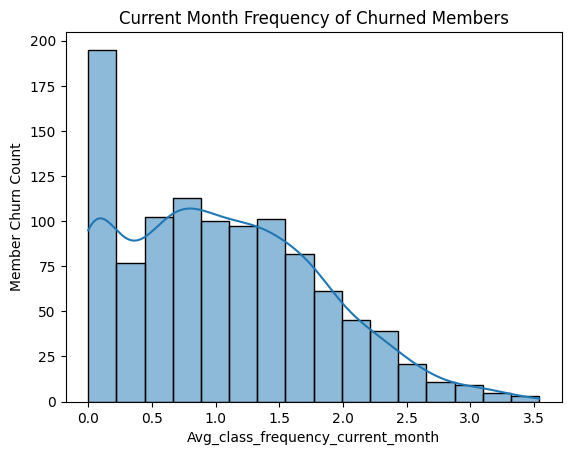

In [15]:
sns.histplot(data=df[df['Churn']==1], x='Avg_class_frequency_current_month', kde=True)
plt.title('Current Month Frequency of Churned Members')
plt.ylabel('Member Churn Count')
plt.show()

We also see from the `Month_to_end_contract` plots that most members leave with one month left on their contract.

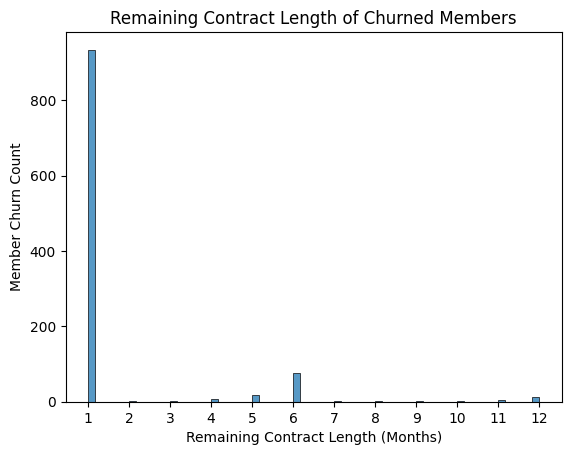

In [16]:
sns.histplot(data=df[df['Churn']==1], x='Month_to_end_contract')
plt.title('Remaining Contract Length of Churned Members')
plt.xticks(np.arange(12)+1)
plt.xlabel('Remaining Contract Length (Months)')
plt.ylabel('Member Churn Count')
plt.show()

## Binary Feature Plots

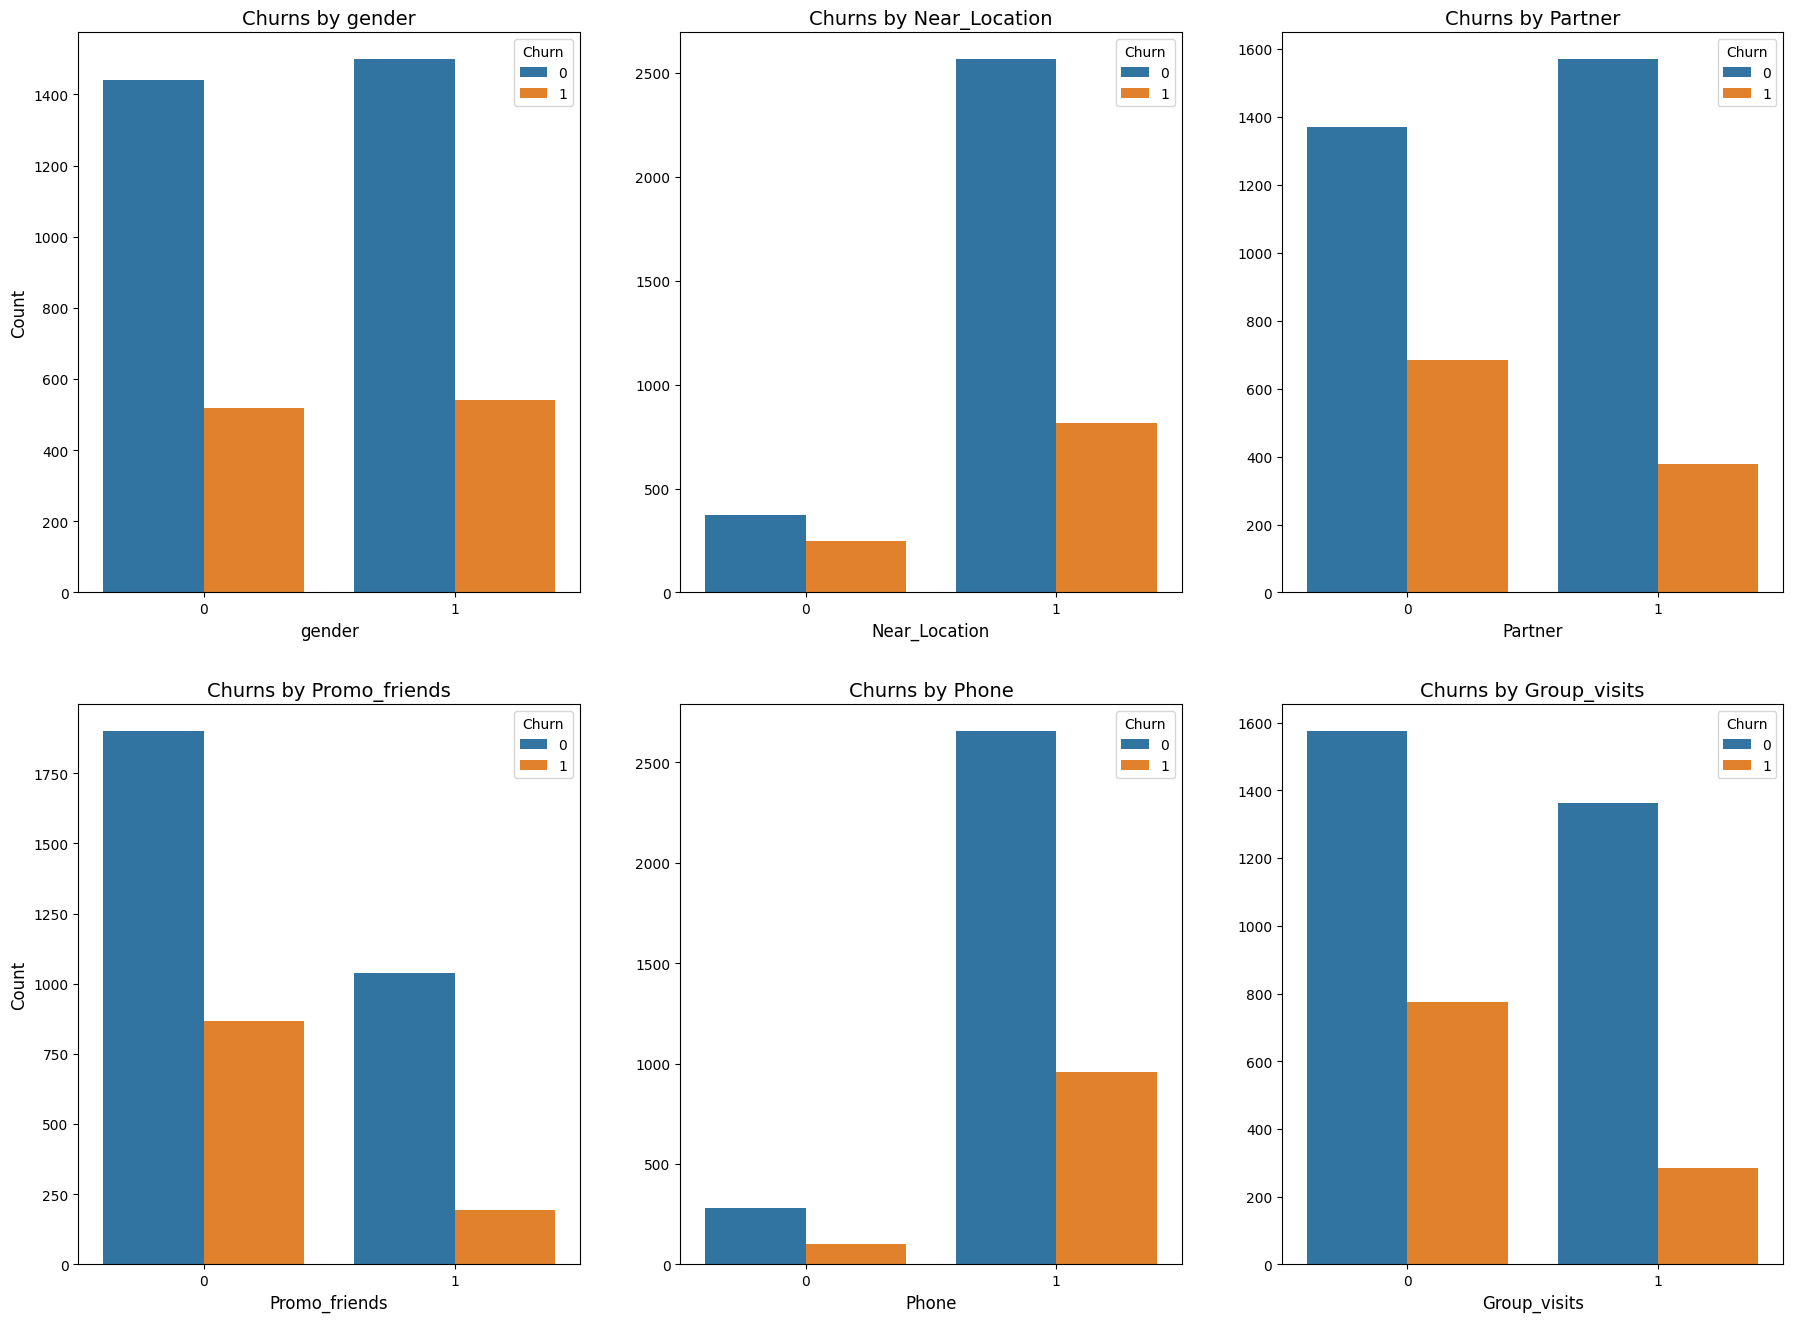

In [17]:
fig, ax = plot_bar(df[binary_cols+['Churn']], figsize=(22,16))
plt.show()

Here we visualize the raw magnitude of churns for the binary features. This can give us a good idea of where the gym is losing most of its members. However, this does not paint the full picture. For example, we see that the gym loses more members who live/work close nearby. But the churn rate for members that live/work nearby is lower than the rate for members who don't live/work nearby. To better visualize this, we plot the churn rates for each of the binary variables.

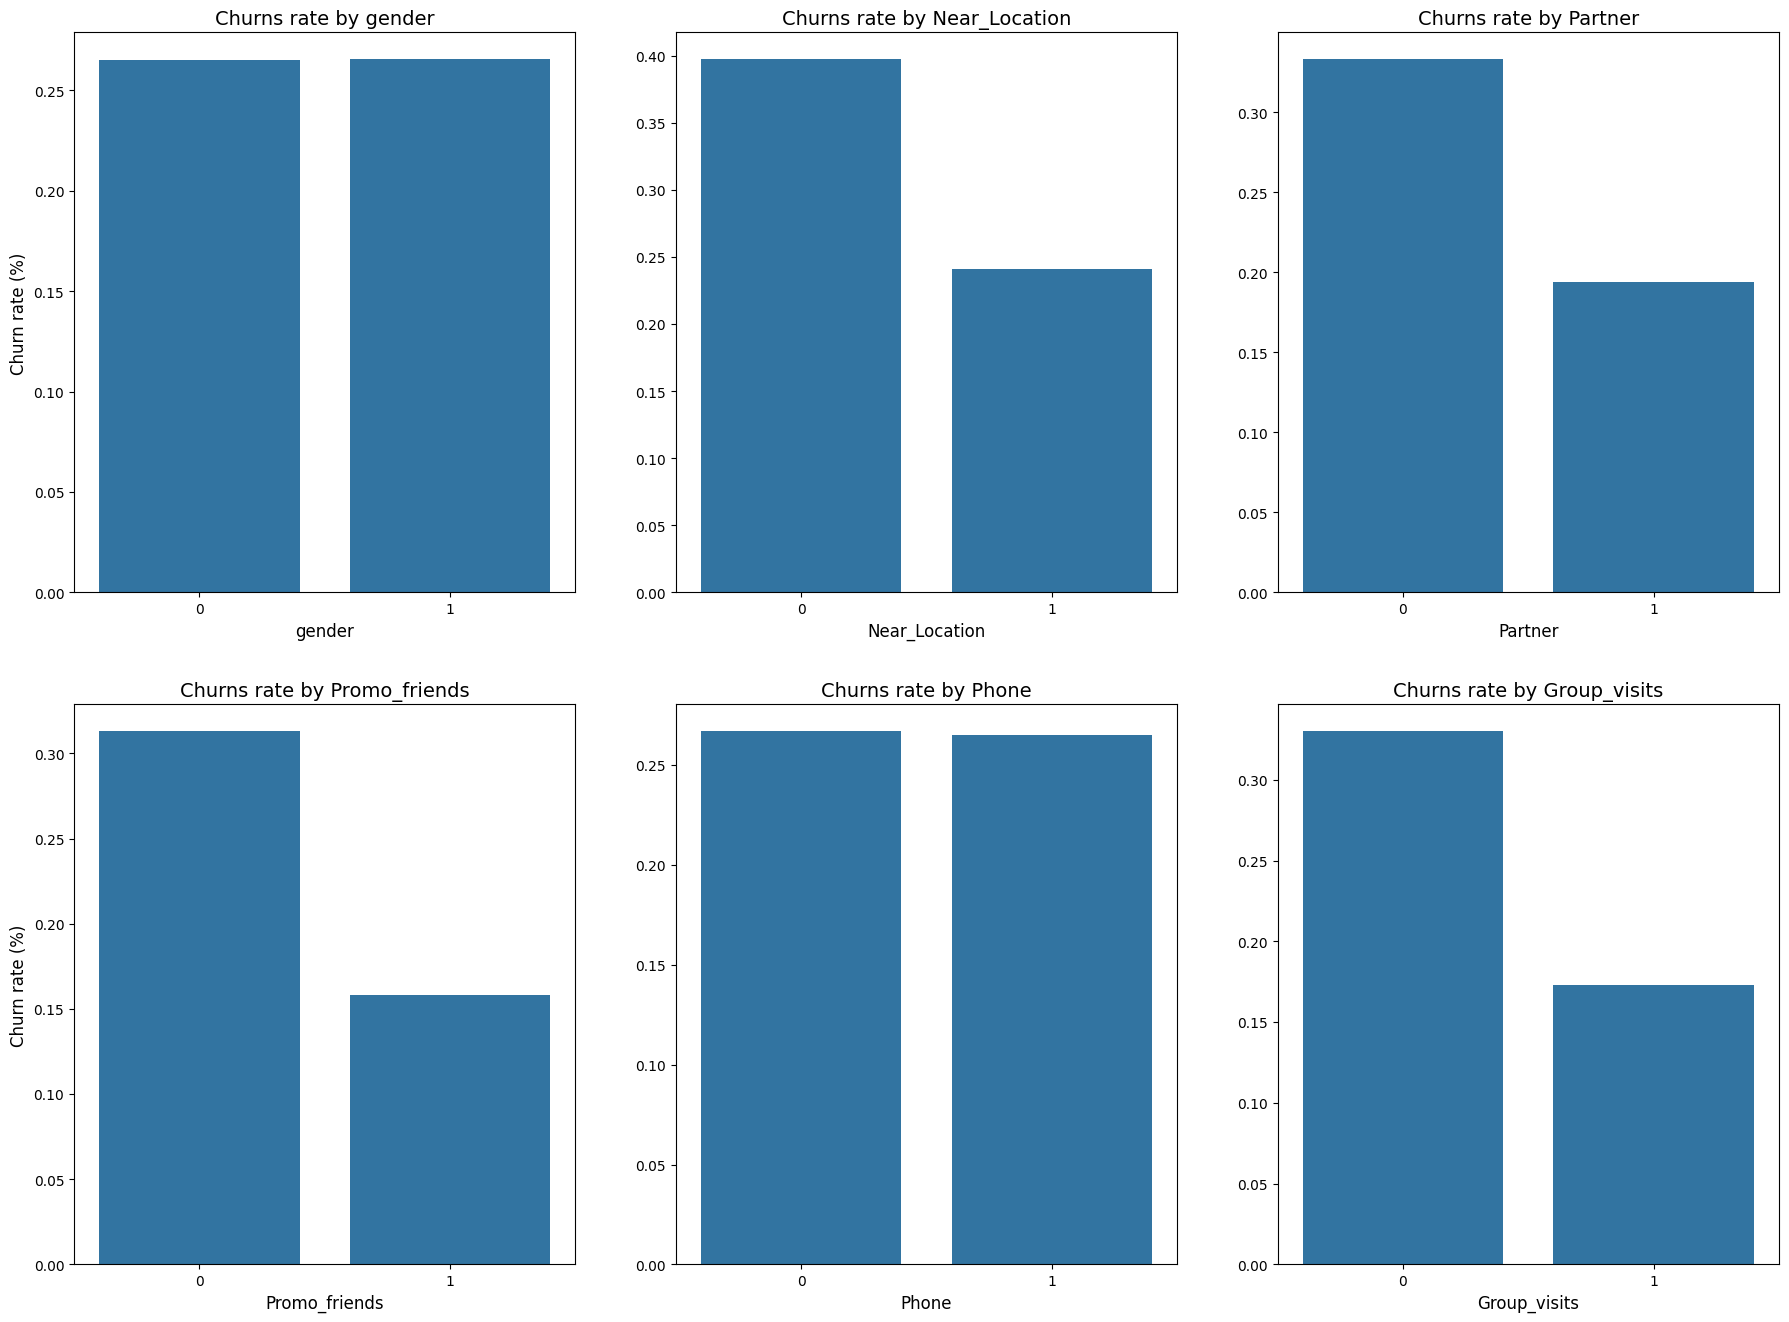

In [18]:
fig, ax = plot_bar(df[binary_cols+['Churn']], figsize=(22,16), relative=True)
plt.show()

Combining both the raw magnitude and relative churn rates gives us a better idea of which customers are likely to leave the gym. Let's revisit the previous example. More members live/work nearby than members that don't. This is why we see a higher number of members leaving in the group that lives/works nearby. However, the percentage of members that live/work nearby is much lower than the percentage of people that don't live/work nearby (25% vs 40%). This suggests members who are not nearby are more at risk, despite not losing as many of these members compared to members who are nearby.

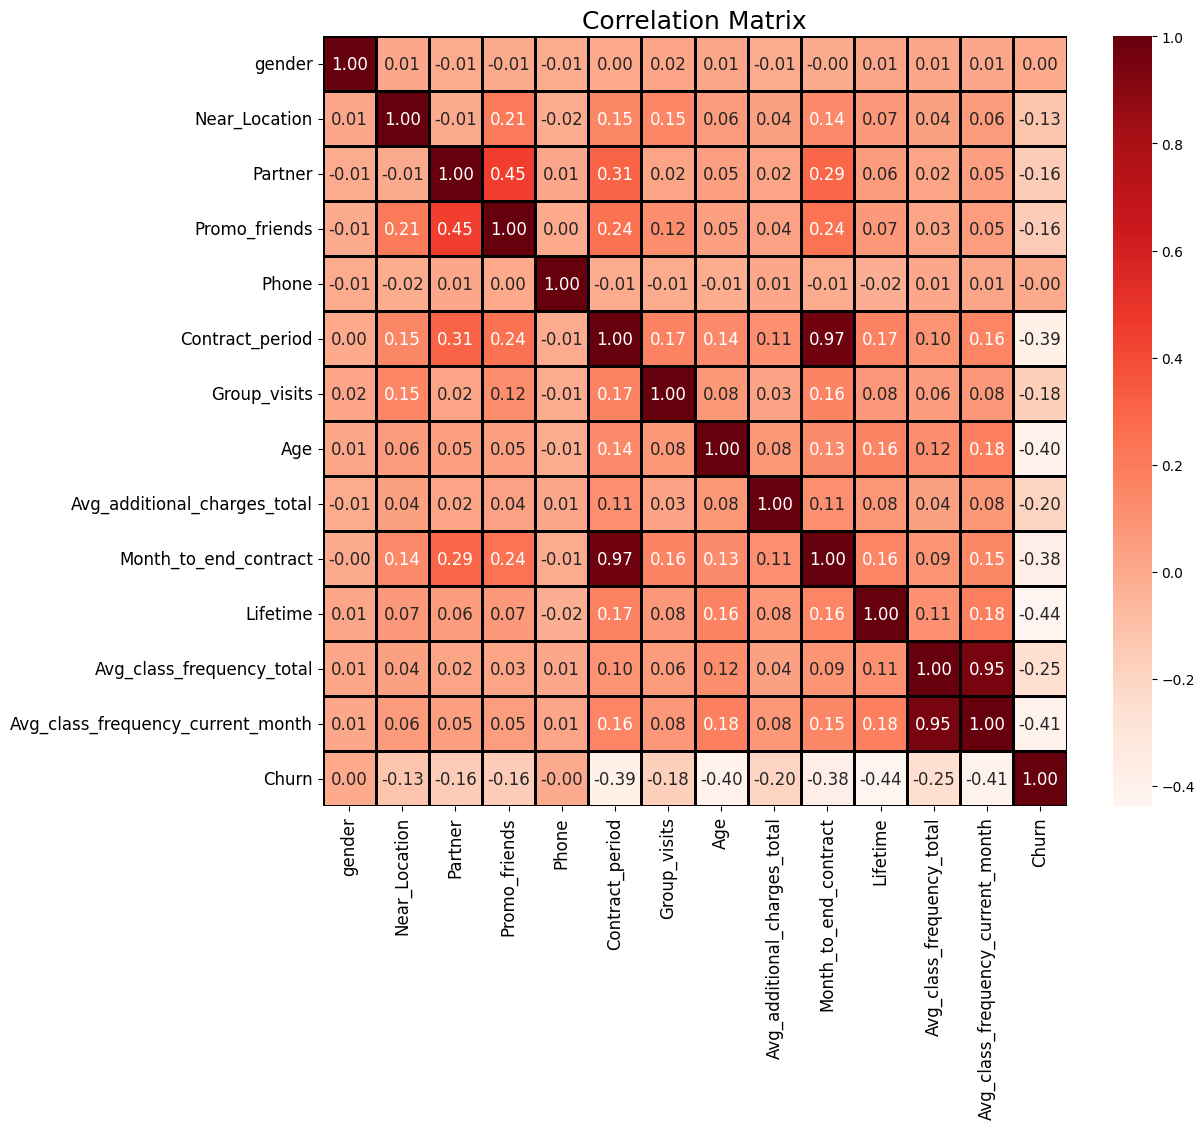

In [19]:
corr_mat = df.corr()

fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(corr_mat, annot=True, cmap='Reds', 
            linecolor='black', linewidths=2, annot_kws={"fontsize":12}, fmt='.2f', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

We can gain some valuable insights from the correlation matrix.
1. Customer churn is mostly influenced by 
    * `Age`
    * `Contract_period`
    * `Month_to_end_contract`
    * `Lifetime`
    * `Avg_class_frequency_current_month`
    
    Each of these features is negatively correlated with `Churn`. This means that members who are younger, opt for shorter contract lengths, are closer to contract expiration, have less time with the gym, and lower visit frequency are more at risk of canceling their membership.

2. `Partner` and `Promo_friends` have a relatively strong positive relationship. This suggests that lowering the monetary barrier to entry is a reasonably efficient way of bringing in new customers.

## Conclusions

1. Newer members with shorter contract lengths are more likely to leave. These members are less likely to commit to the gym and use these short contract periods as a 'trial' run for the gym. 

2. Members that leave will generally do so within the first couple of months.

3. Members are more likely to leave as their frequency approaches zero. Combining this with 2. means that gyms should keep customers engaged, especially within the first few months, to entice members to retain their membership status.

4. The final month of a member's contract is when they are most likely to leave the gym. This is especially important for customers who are on one month contracts, as these customers are already vulnerable to begin with.

5. Members are less likely to leave the gym as their gym lilfetime increases. These customers have shown commitment to gym related activities and are generally willing to stick with it for the foreseeable future.

6. Younger members are more likely to leave. This might be explained by the fact that younger people live generally less stable lives. They may be tight on money or move because of job opportunities.